In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv(r'C:\Users\HP\Downloads\loan_prediction\loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.drop(columns='Loan_ID', inplace=True)

In [7]:
# Handling missing values
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


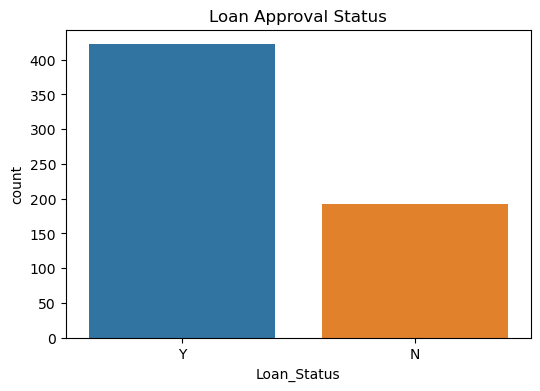

In [9]:
# Visualizing loan approval status
plt.figure(figsize=(6, 4))
sns.countplot(x='Loan_Status', data=df)
plt.title('Loan Approval Status')
plt.show()

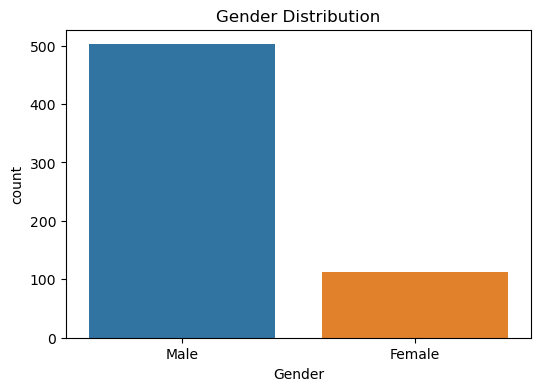

In [10]:
# Visualizing gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

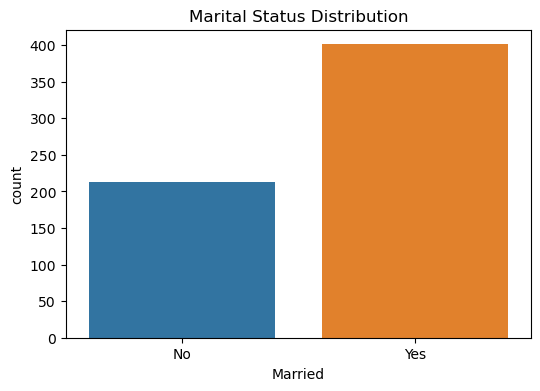

In [11]:
# Visualizing marital status distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Married', data=df)
plt.title('Marital Status Distribution')
plt.show()

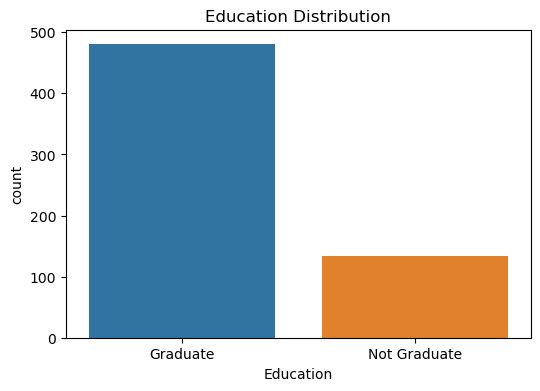

In [12]:
# Visualizing education distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Education', data=df)
plt.title('Education Distribution')
plt.show()

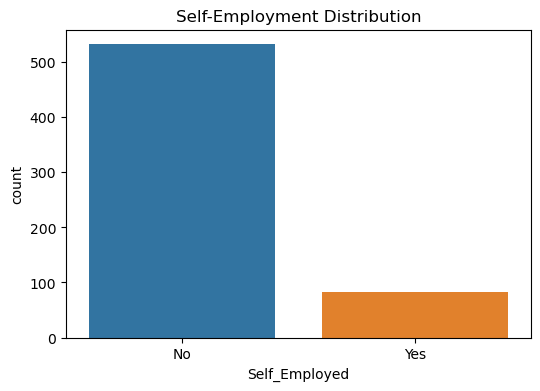

In [13]:
# Visualizing self-employment distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Self_Employed', data=df)
plt.title('Self-Employment Distribution')
plt.show()

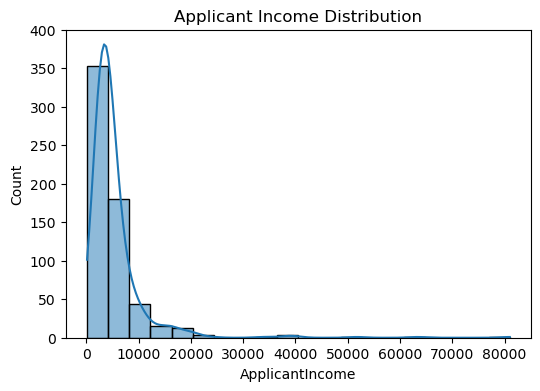

In [14]:
# Visualizing applicant income distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['ApplicantIncome'], bins=20, kde=True)
plt.title('Applicant Income Distribution')
plt.show()

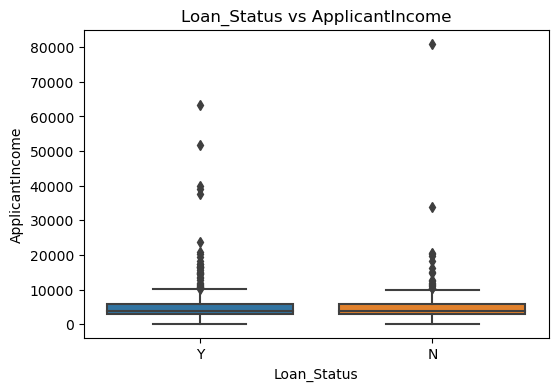

In [15]:
# Visualizing loan status vs applicant income
plt.figure(figsize=(6, 4))
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df)
plt.title('Loan_Status vs ApplicantIncome')
plt.show()

In [16]:
# Removing outliers in applicant income
Q1 = df['ApplicantIncome'].quantile(0.25)
Q3 = df['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['ApplicantIncome'] >= lower_bound) & (df['ApplicantIncome'] <= upper_bound)]

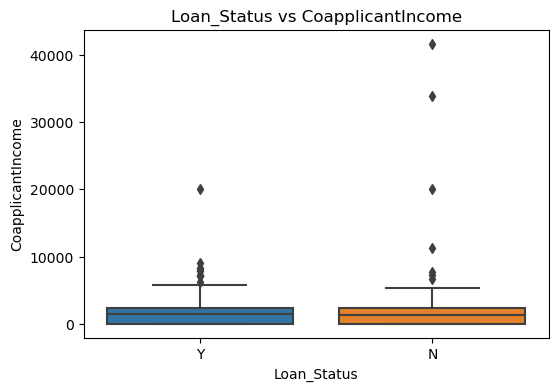

In [17]:
# Visualizing loan status vs co-applicant income
plt.figure(figsize=(6, 4))
sns.boxplot(x='Loan_Status', y='CoapplicantIncome', data=df)
plt.title('Loan_Status vs CoapplicantIncome')
plt.show()

In [18]:
# Removing outliers in co-applicant income
Q1 = df['CoapplicantIncome'].quantile(0.25)
Q3 = df['CoapplicantIncome'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['CoapplicantIncome'] >= lower_bound) & (df['CoapplicantIncome'] <= upper_bound)]

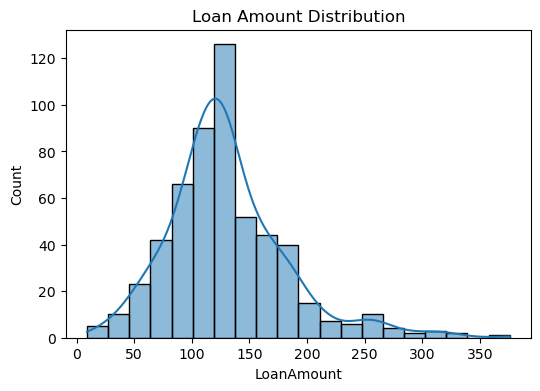

In [19]:
# Visualizing loan amount distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['LoanAmount'], bins=20, kde=True)
plt.title('Loan Amount Distribution')
plt.show()

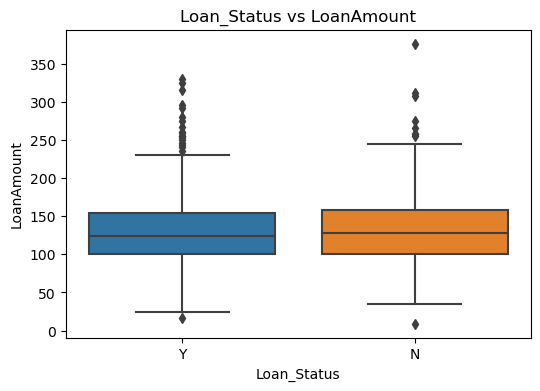

In [20]:
# Visualizing loan status vs loan amount
plt.figure(figsize=(6, 4))
sns.boxplot(x='Loan_Status', y='LoanAmount', data=df)
plt.title('Loan_Status vs LoanAmount')
plt.show()

In [21]:
# Data preprocessing
df['Loan_Status'].replace('Y', 1, inplace=True)
df['Loan_Status'].replace('N', 0, inplace=True)

df = pd.get_dummies(df, drop_first=True)

In [22]:
df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,1,True,False,False,False,False,False,False,False,True
1,4583,1508.0,128.0,360.0,1.0,0,True,True,True,False,False,False,False,False,False
2,3000,0.0,66.0,360.0,1.0,1,True,True,False,False,False,False,True,False,True
3,2583,2358.0,120.0,360.0,1.0,1,True,True,False,False,False,True,False,False,True
4,6000,0.0,141.0,360.0,1.0,1,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,1,False,False,False,False,False,False,False,False,False
610,4106,0.0,40.0,180.0,1.0,1,True,True,False,False,True,False,False,False,False
611,8072,240.0,253.0,360.0,1.0,1,True,True,True,False,False,False,False,False,True
612,7583,0.0,187.0,360.0,1.0,1,True,True,False,True,False,False,False,False,True


In [23]:
# Splitting the dataset into train and test sets
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
# Training the Random Forest classifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [26]:
# Predicting loan status
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1],
      dtype=int64)

In [27]:
# Evaluation
accuracy = (y_pred == y_test).mean()
print('Accuracy:', accuracy)

Accuracy: 0.8


In [29]:
import pickle
with open('random_foresr_classifier.pkl', 'wb') as file:
    pickle.dump(classifier, file)